## BANK LOAN APPROVAL PREDICTION – DECISION TREE CLASSIFICATION PROJECT

---------------------------------------------------------------------------------------------------
    This project predicts whether a bank should approve or reject a loan using a Decision Tree model based on customer data.
        Model performance is evaluated using Accuracy, Confusion Matrix, and AUC–ROC.

    The model uses a Decision Tree Classifier to learn decision rules from historical loan data and
        make accurate, interpretable predictions for new applicants.

## PROJECT SCOPE:

1- Dataset loading and preproccessing.

2- Categoring feature encoding.

3- Feature- target separation and train-test split.

4- Decision Tree model training and prediction.

5- Model evaluation using Accuarcy, Confusion Matrix, Precision, Recall, and F1-score.

6- ROC-AUC analysis.

7- Decision Tree visualization

In [1]:
import pandas as pd # Data Handling
import matplotlib.pyplot as plt # visulization

from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.preprocessing import LabelEncoder # Encoding categorical data
from sklearn.tree import DecisionTreeClassifier, plot_tree # Model & visulization
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Evaluation

df = pd.read_csv("smart_loan_data.csv") #Load loan dataset
print("Dataset Loaded Successfully")
print(df.head()) #Display first rows

Dataset Loaded Successfully
   Age  Gender     Education Employment  Monthly_Income  Credit_Score  \
0   59  Female      Graduate   Salaried           35176           568   
1   49    Male      Graduate   Salaried           59386           714   
2   35    Male      Graduate   Salaried           78972           544   
3   28  Female  Not Graduate   Salaried           69482           359   
4   41    Male      Graduate   Salaried           39255           305   

   Loan_Amount  Loan_Term Existing_Loan Property_Area  Loan_Status  
0       332117         36            No     Semiurban            0  
1       348780         24            No         Urban            1  
2       433936         36            No     Semiurban            0  
3       493444         36           Yes     Semiurban            0  
4       583498         36            No         Rural            0  


## DATA CLEANING :

In [3]:
df.drop_duplicates(inplace=True) # Remove duplicated rows
df.dropna(inplace=True) #Remove missing values

## DATA PREPROCESSING :

In [5]:
cat_cols = ["Gender", "Education", "Employment", "Property_Area"] # Catregorical columns
le = LabelEncoder() # Inotialize Label encoder

for col in df.columns: #Loop throught each column
    if df[col].dtype == "object": # Check for categorical data
        df[col] = le.fit_transform(df[col]) # Convert text to numeric

#or ------------------------------------------------------------------------

le = LabelEncoder()                               # Create encoder

df["Gender"] = le.fit_transform(df["Gender"])     # Encode Gender
df["Education"] = le.fit_transform(df["Education"])   # Encode Education
df["Employment"] = le.fit_transform(df["Employment"]) # Encode Employment
df["Existing_Loan"] = le.fit_transform(df["Existing_Loan"]) # Encode Existing Loan
df["Property_Area"] = le.fit_transform(df["Property_Area"]) # Encode Property Area

In [7]:
X = df.drop("Loan_Status", axis=1) # All Features automatically | # Input feactures
y = df["Loan_Status"] # Target variable

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
) # Split data for training & testing

## MODEL TRAINING :
    This code builds and trains a Decision Tree model to learn how to approve or reject loans based on past data.

In [9]:
model = DecisionTreeClassifier(
    criterion="gini", # Decides how to split data
    max_depth=4, # Controls how deep the tree can grow | # Control tree depth
    random_state=42
);

model.fit(X_train, y_train); # Train Decision Tree model

In [10]:
y_pred = model.predict(X_test) # Pedict Loan approval (0/1)
y_prob = model.predict_proba(X_test)[:,1] # Predict approval probability


In [11]:
print("\nAccuracy:", accuracy_score(y_test, y_pred)) # Overall accuaracy
print("\nConfussion Matrix:\n", confusion_matrix(y_test, y_pred)) # Prediction summary
print("\nClassification Report:\n", classification_report(y_test, y_pred)) # Detailed metrics


Accuracy: 1.0

Confussion Matrix:
 [[164   0]
 [  0  86]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00        86

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



##  DECISION TREE VISUALIZATION :

    low credit score = Reject
    Good credit + good income = Approve

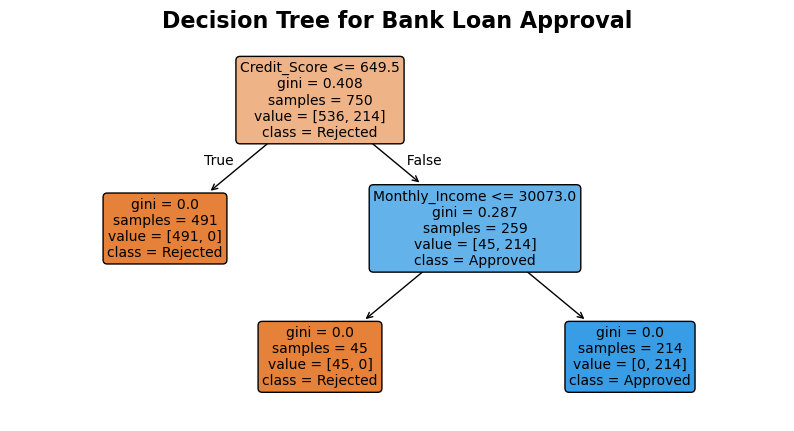


 THis Decision Tree Visually shows how loan approval decision are made using rules based on credit score and income.


In [14]:
plt.figure(figsize=(10,5));

plot_tree(
    model, # Trained Decision Tree model
    feature_names=X.columns.tolist(), # Features names as list
    class_names=["Rejected", "Approved"], # Output class labels
    filled=True, # Color nodes by class
    rounded=True, # Rounded node boxes ( Clean look )
    fontsize=10 # Control text size
);

plt.title("Decision Tree for Bank Loan Approval", fontsize = 16, fontweight = 'bold')
plt.show();

print("\n THis Decision Tree Visually shows how loan approval decision are made using rules based on credit score and income.");

# If Credit Score ≤ 649.5, the loan is Rejected.
# If Credit Score > 649.5 and Monthly Income > 30,073, the loan is Approved; otherwise, it is Rejected.

In [15]:
new_customer = pd.DataFrame([{
    "Age": 30,
    "Gender": "Male",
    "Education": "Graduate",
    "Employment": "Salaried",
    "Existing_Loan": "No",
    "Property_Area": "Urban",
    "Credit_Score": 720,
    "Loan_Amount": 250000,
    "Loan_Term": 24,
    "Monthly_Income": 55000
}])

# Encode categorical columns
for col in new_customer.columns:
    if new_customer[col].dtype == "object":
        new_customer[col] = le.fit_transform(new_customer[col])

# MPORTANT STEP: match training column order
new_customer = new_customer[X.columns]

# Predict result
prediction = model.predict(new_customer)[0]
probability = model.predict_proba(new_customer)[0][1]

print("Approval Probability:", round(probability, 2))
print("Loan Approved" if prediction == 1 else "Loan Rejected");

Approval Probability: 1.0
Loan Approved
